# Clase 2 : Numpy y graficación
---
## Repaso de algebra matricial
* Vector y matriz
* Producto elemento a elemento
* Producto de matrices
* Producto punto y producto cruz de vectores
* Transpuesta e inversa, pseudo inversa

## ¿Qué es Numpy?
---
Numpy es una paquetería fundamental para la operación de arreglos númericos multidimencionales, además de operaciones rápidas con los mismos. 
Esta paquetería basa su funcionamiento en el objeto ndarray, que contiene arreglos n-dimensionales de datos de tipo homogeneo.
Las principales caracteristicas que tiene son:

* Tamaño ajustado, al cambiarlo se borra el objeto anterior y se crea uno nuevo en la memoria.
* Tipo de dato homogeneo
* Permite operaciones de forma eficiente, a comparación del uso de ciclos para las mismas.



In [1]:
import time as tm
print ("tm.clock(): %f " % tm.clock())
print ("tm.time(): %f " %  tm.time() )
print (tm.localtime( tm.time() ) )
print (tm.asctime( tm.localtime(tm.time()) ) )

tm.clock(): 0.000002 
tm.time(): 1533446638.701707 
time.struct_time(tm_year=2018, tm_mon=8, tm_mday=5, tm_hour=0, tm_min=23, tm_sec=58, tm_wday=6, tm_yday=217, tm_isdst=1)
Sun Aug  5 00:23:58 2018


In [2]:
#Utilizando clock y ciclos
import numpy as np
import time as tm

D=1000; #Probar con 1,10,1000

a=2*np.ones((D,D));
b=3*np.ones((D,D));

c=np.zeros((D,D));
Z1=tm.clock()
for i in range(len(b)):    
    for j in range(len(b)):
        c[i,j]=(a[i,j]*b[i,j])
Z2=tm.clock()-Z1
print (Z2)
print (c)

Z3 =tm.clock()
c=a*b
Z4=tm.clock()-Z3;
print (Z4)
print (c)

0.7193094409456169
[[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]]
0.006853022590386004
[[6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 ...
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]
 [6. 6. 6. ... 6. 6. 6.]]


In [ ]:
# empleando definiciones y decorator
from __future__ import print_function, division
import numpy as np
from time import time
from functools import wraps

D=1000; #Probar con 1,10,1000

a=2*np.ones((D,D));
b=3*np.ones((D,D));
c=np.zeros((D,D));

# Decorator para medir el tiempo
def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = tm.clock()
        result = f(*args, **kw)
        te = tm.clock()
        print('func:%r args:[%r, %r] took: %2.6f sec' % \
          (f.__name__, args, kw, te-ts))
        return result
    return wrap

@timing
def producto_normal(a, b):
    for i in range(len(b)):    
        for j in range(len(b)):
            c[i,j]=(a[i,j]*b[i,j])
@timing
def producto_numpy(a, b):
    c = a * b

print(producto_normal(a, b))
print(producto_numpy(a, b))

### Instalando Numpy
----
Requerimos tener Python previamente. Anaconda ya cuenta con una paquetería de Numpy. Probar con: "import Numpy as np"
Ante posibles complicaciones la página recopilatoria :https://scipy.org/install.html tiene información al respecto. Y dentro de anaconda ya viene instalada.

### Instrucciones y funciones de numpy
Los elementos dentro de un array de numpy están ordenados por ejes, o "axes".
A continuación listaremos un conjunto de los atributos más importantes que tenemos en numpy.

*ndarray.ndim* Número de ejes del arreglo.
*ndarray.shape* Dimensiones del arreglo, retorna: (filas, columnas, etc).

*ndarray.size*Total de elementos en el arreglo.
*ndarray.dtype* 
*ndarray.data*  Localidad que contiene a los elementos del array. 

In [ ]:
import numpy as np

a1=np.arange(10).reshape(5,2);
a2=np.array([[1,2,3],[3,4,5]]);

print (a1, a1.shape)
print (a2, a2.shape)
print()

print (a2.size)
print (a1.dtype) 

### Formas de crear un array

In [ ]:
#a = np.array(1,2,3,4) # WRONG
a = np.array([1,2,3,4]) # RIGHT
b = np.array(4)
print( a,b)
print()

c = np.array( [ [1,2], [3,4] ], dtype=complex )
print (c)


### Funciones
* .zeros((m,n))
* .ones((m,n))
* .empty((m,n))

* .linspace('inicio','fin','cantidad')

array, zeros, zeros_like, ones, ones_like, empty, empty_like, arange, linspace,
numpy.random.rand, numpy.random.randn.

In [ ]:
import numpy as np

print( np.linspace(0,1,5))
print (np.linspace(1,0,5))

x = np.linspace( 0, 2*np.pi, 5 )
print  ( x)
print (np.sin(x))
#Funciones Universales: ufunc. 

print (np.random.rand(1,1))
print (np.random.randn(1,1)) #Random normal de varianza 1, media 0: 
                            # sigma*np.random.randn()+mu


$$ N(\mu,\sigma^2)$$

#### Suma, resta, producto
---
    Es posible utilizar los signos +=, -=, etc. tal como en C

In [ ]:
A = np.array( [[1,1],
               [0,1]] )
B = np.array( [[2,0],
               [3,4]] )

A*B # elementwise product

In [ ]:
A.dot(B) # producto matricial

In [ ]:
np.dot(A, B) 

#### Suma, mínimo, máximo, reshape
#### cumsum, sqrt,e

In [ ]:
import numpy as np
b = np.arange(12).reshape(3,4)
print(b) 
print(b.sum(axis=0))  # suma de columna
print(b.min(axis=1))  # minimo de fila
print(b.max() )       # maximo total
#b.max(axis=2) ?

print (b.cumsum(axis=1)) # suma acumulada por filas
#b.cumsum() ?

T=np.exp(1) 
#T=np.sqrt(2)
#T=np.sqrt(4)
print (T)

#### Insertar datos, cortar e iterar
Igual, que otras listar y arreglos de Python es posible insertar, cortar e iterar datos
Se siguen los mismos principios para arreglos multidimencionales, separando con una coma: "," cada dimensión respectiva

In [ ]:
a = np.arange(10)**3
a

In [ ]:
a[2]


In [ ]:
a[2:5] #El limite superior es excluyente "[a,b)" para b>1 


In [ ]:
a[0:6:2]=-100 # Del 0 al 6, de 2 en 2
a

In [ ]:
a[: :-1] #Revertir

In [ ]:
a[-1]  #ultimo elemento

In [ ]:
b = np.arange(9).reshape(3,3)**2
b

In [ ]:
b[0:2,1:3]

In [ ]:
for i in b:
    print (i)
    
for i in b.flat: #.flat atributo que posee los elementos del arreglo de forma unidimencional
    print (i)

### Modificación al tamaño/forma

In [ ]:
import numpy as np
a = np.floor(10*np.random.random((2,3)))
a

In [ ]:
a.shape

In [ ]:
a.flat
a.ravel()

In [ ]:
a.T

In [ ]:
a.reshape(3,-1) # -1 para valores automaticos existentes

### Concatenación
Expresión referente al unir o enlazar entidades

In [ ]:
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
np.vstack((a,b))

In [ ]:
np.hstack((a,b))

In [ ]:
np.concatenate((a,b),1) # "(arreglos a concatenar enlistados), dimensión de concatenación"

### Algebra lineal 
Transposición, Inverza, Identidad $N * N$, producto matricial,

Traza, producto cruz, producto punto, producto exterior, producto interior

Solución de sistema, Eigenvalor y Eigenvector


In [ ]:
import numpy as np
A=np.array([[1,2],[3,4]])
A.transpose()

In [ ]:
B=np.linalg.inv(A)
B

In [ ]:
D=np.linalg.pinv(np.array([[1,2],[3,4],[5,6]]))
D

In [ ]:
u = np.eye(2) #Identidad
u

In [ ]:
np.dot(A,B)

In [ ]:
np.trace(B) #Suma de diagonal principal

In [ ]:
A=np.array([1,2,3]);
B=np.array([3,2,1]);
np.cross(A,B)         #Producto cruz (Si tienen diferente dimención se agregan 0's)

In [ ]:
A*B                  #Producto punto

In [ ]:
np.outer(A,B)        #Producto exterior 

$ A*B   $ Producto exterior 

$A=[a_0,a_1,a_2,...a_n]$
$B=[b_0,b_1,b_2,...b_m]$

$A*B=$
$\begin{bmatrix}
a_0b_0 \ a_0b_1 \ a_0b_2&.&.&. \ a_0b_m \\
a_1b_0 \ a_1b_1 \ a_1b_2&.&.&. \ a_1b_m \\
&. &. &.  \\
a_nb_0 \ a_nb_1 \ a_nb_2&.&.&. \ a_nb_m 
\end{bmatrix}$

In [ ]:
np.inner(A,B)       #Producto interior  

$A*B$ Producto interior

$A*B= \Sigma_{i=0}^m [a_ib_i] $ 

In [ ]:
y = np.array([[5], [7]])
A=np.array([[1,2],[3,4]])
X=np.linalg.solve(A, y)
X

$ Ax=Y\\ 1x_1+2x_2=5\\ 3x_1+4x_2=7 $
$\\ x= [-3,4]'$

In [ ]:
np.dot(A,X)

In [ ]:
A=np.array([[4,1],[6,3]])
w,v =np.linalg.eig(A)

print("Eigen valores: \n" ,w)
print("Eigen vectores: \n ", v)

### Breve explicación de eigen valores y eigen vectores

Eigenvalores, soluciones a la ecuación, del polinomio:

$| A-\alpha I |= 0 $

Donde $I$ representa la identidad $N x N$ y $\alpha$ representa un vector de $N$

Eigenvectores, soluciones a la ecuación matricial:

$Av=\alpha_nv$

Donde $v$ representa el eigenvector que soluciona dicha ecuación y $\alpha_n$ representa el n-esimo eigenvalor

In [ ]:
w, v = np.linalg.eig(np.diag((1, 2, 3)))

print("Eigen valores:\n " ,w)
print("Eigen vectores: \n ", v)

## Funciones estadísiticas

In [ ]:
import numpy as np
A = np.random.rand(10,10)

In [ ]:
# Media
np.mean(A, axis=0)

In [ ]:
# Desviación estándar
np.std(A)

In [ ]:
# Minimo
np.min(A)

In [ ]:
# Máximo
np.max(A)

## I/O 
Numpy posee una subpaquetería dedicada a la entrada y salida de datos, capaz de formar arrays a partir de datos tabulados.

La principal función a trabajar de la libreria io será "getfromtxt", que realiza dos acciones al ejecutarse: 
* convierte cada linea en una secuencia de strings
* le asigna a cada string el tipo de dato adecuado

A diferencia de otras funciones como loadtxt, esta pese a ser más lenta permite la interpretación de los datos.

La función puede reconocer archivos tipo: 'gzip' y 'bz2' (bzip2).

La documentación extendida de esta paquetería se encuentra en:
https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.io.html
Recomendamos revisar las funciones existentes para saber cuales pueden ser de utilidad particular.

In [ ]:
import numpy as np
from io import StringIO

Al tomar datos que provienen de un csv (usualmente separados por , o por ;)

In [ ]:
data = '1,2,3\n4,5,6'
A=np.genfromtxt(StringIO(data), delimiter=",")
print(A)

#Nuestro delimitador debe ser seleccionado, pero es libre de ser cualquier elemento escribible:
data = "  1  2  3\n  4  5 67\n890123  4"
B=np.genfromtxt(StringIO(data), delimiter=3)
print("\n", B)


Notemos como a la entrada de datos "data" se le aplica una transformación especifica para poder ser empleada.
Esto es porque el primer argumento de la función "fname" 
lee archivos, str, paths, lista de str pero los str deben ser procesados para su entrada.

A continuación se leerán 3 txt cuyos delimitadores serán "|",  " " y  "¿" respectivamennte.
Además el primer txt tiene datos de diferentes clases en sus columnas

El segundo es homogeneo en columnas.

Y el tercero posee datos faltantes.

In [ ]:
A=np.genfromtxt('Class2D\Data1.txt', delimiter="|")
print(A)


In [ ]:
A=np.genfromtxt('Class2D\Data2.txt',dtype="i8,S7,f2",names=['Enteros','Cadenas','Flotantes'])
#¿Que le ocurre a los elementos que tienen más datos de los que se leerán?
print("\n",A)

print("\n",A[1][1])

A.dtype  

In [ ]:
A=np.genfromtxt('Class2D\Data3.txt',delimiter="¿")
print(A)
#¿Qué ocurre cuando nos faltan datos?

"delimiter" también puede funcionar indicandole cuantos elementos tendrá cada dato de cada columna.

Por ejemplo:    "delimiter=[1,3,5]"

Tomará 1, 3 y 5 elementos de los datos de cada columna respectiva.

### Savetxt
>np.save(fname,array,fmt*,delimiter*,newline*)

* fname: nombre del archivo
* array: arreglo a guardar en cuestion
* fmt  : formato de guardado de los números,  (%3.2f 3 enteros, 2 decimales, florante) (1.4e 1 potecia, 4 base, exponencial)

In [ ]:
A = np.floor(10*np.random.random((4,3)))-5
B = np.diag([3,5,4])**6
    
np.savetxt('Archivo1.txt',A) #Guardado en formato general al no especificar
np.savetxt('Archivo2.txt',B,fmt='%2.5e')

#No olviden agregar la terminación asociada


#### Ejemplo particular: Fractal de Mandelbrot
A continuación se ejemplifica el fractal de mandelbrot, para ello se emplea: 

np.ogrid, que genera ejes definidos por sus entradas en cada dimensión, además de 
np.conj

In [ ]:
np.ogrid[0:1:3j,0:1:3j]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=100): #maxima iteración 
    #"""Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -2:2:h*1j, -2:2:w*1j ] #generación de ejes generadores de plano y,x
    c = x+y*1j                                   #plano complejo c
    
    z = c                          #escrito como Z
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2        # who is diverging
        div_now = diverge & (divtime==maxit) # who is diverging now
        divtime[div_now] = i                 # note when
        z[diverge] = 2                       # avoid diverging too much
    return divtime
plt.figure(figsize=(12,12))
plt.imshow(np.log(1+mandelbrot(500,500)))
plt.show()

# Matplotlib *
---
Librería para graficación de arreglos 2D, originalmente creada para emular las propiedades gráficas de MatLab®.
Esta librería hace uso en ocasiones de Numpy, aunque está basada directamente en Python.
La filosofía de Matplotlib es poder crear gráficas ilustrativas con pocos o solo un comando.

### Instalación
En general, desde terminal Python:
* python -mpip install -U pip
* python -mpip install -U matplotlib

Empleando anaconda:
* conda install -c conda-forge matplotlib 
* conda install -c conda-forge/label/broken matplotlib 
* conda install -c conda-forge/label/testing matplotlib 
* conda install -c conda-forge/label/rc matplotlib


### Plot y subplot
Ambas nos permiten trabajar sobre cierto "axis" declarado con ciertos métodos y atributos que podrémos ajustar.
Es la representación más simple de gráficas que veremos, y son similares a sus analogas de MatLab®.

In [ ]:
%matplotlib inline  
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
t=np.linspace( 0, 2*np.pi, 100 )
y=np.sin(t)
plt.plot(t,y)
plt.show()

## Estilos

Matplotlib admite varios estilos de graficacion, entre ellos se encuentran:
* ggplot: Librería más usada para graficación en R
* bmh: Estilo del libro _Bayesian Mehods for Hackers_
* FiveThrityEight: Estilo usado para las gráficas de ESPN
* seaborn: Librería de graficación estadística de Python
* classic: Estilo inspirado en Matlab y otras programas sencillos

In [ ]:
estilos = ['dark_background', 'ggplot', 'bmh', 
           'fivethirtyeight', 'seaborn', 'classic',
          'grayscale', 'Solarize_Light2', 'default']

X = np.linspace(0, 10, 1000)
Y = np.sin(X)

plt.figure(figsize=(10,10))
for i, c in enumerate(estilos):
    plt.style.use(c)
    plt.subplot(3, 3, i+1)
    plt.title(c, color='black')
    
    plt.plot(X, Y)
    
plt.show()

In [ ]:
X = np.random.randn(1000)
Y = np.random.randn(1000) + 3.5

plt.figure(figsize=(10,10))
for i, c in enumerate(estilos):
    plt.style.use(c)
    plt.subplot(3, 3, i+1)
    plt.hist(X, alpha=0.6)
    plt.hist(Y, alpha=0.6)
    plt.title(c, color='black')
plt.show()

Entre los principales argumentos editables tenemos:
* color='green',
* marker='o',
* linestyle='dashed',
* linewidth=2, 
* markersize=12

Estás son resumidas con el parametro opcional [fmt]
fmt = '[color][marker][line]'

### Colores:
---
|caracter|	color|
|---|---
|'b'	  |blue|
|'g'      |green|
|'r'	  |red|
|'c'	  |cyan|
|'m'	  |magenta|
|'y'	  |yellow|
|'k'	  |black|
|'w'	  |white|

### Estilos de linea
---
|caracter|	descripción
|---|---
|'-'	|solid line style
|'--'	|dashed line style
|'-.'	|dash-dot line style
|':'	|dotted line style

### Marcadores
---
|caracter|	descripción
|---|---
|'.'	|point marker
|','	|pixel marker
|'o'	|circle marker
|'v'	|triangle_down marker
|'^'	|triangle_up marker
|'<'	|triangle_left marker
|'>'	|triangle_right marker
|'1'	|tri_down marker
|'2'	|tri_up marker
|'3'	|tri_left marker
|'4'	|tri_right marker
|'s'	|square marker
|'p'	|pentagon marker
|'*'	|star marker
|'h'	|hexagon1 marker
|'H'	|hexagon2 marker
|'+'	|plus marker
|'x'	|x marker
|'D'	|diamond marker
|'d'	|thin_diamond marker
|$|$	|vline marker
|'_'	|hline marker


In [ ]:
# import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
fmt1='b-1'
fmt2= 'k:H'
fmt3='r-*'

t=np.linspace( 0, 2*np.pi, 30 )
y=np.sin(t)
plt.plot(t,y,fmt1)
plt.plot(t,np.sin(t*2),fmt2)
plt.plot(t,np.sin(t*0.5),fmt3)
plt.title('Titulo $\int_0^{1}{x^2}$') #Es posible incluir Tex en titulos y etiquetas de ejes
plt.xlabel('Secuencia de X')
plt.ylabel('Secuencia de Y $\Delta$')

plt.grid() #Habilitar grid

plt.xlim([-1,1])
plt.ylim([0,6])
plt.autoscale()   #Ejemplo 

plt.text(-0.1, -0.85, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$', fontsize=15)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dt = 0.1
x = np.arange(-50.0, 50.0, dt)
y = np.arange(0, 100.0, dt)

plt.subplot(211)
plt.plot(x, y)
plt.xscale('symlog')
plt.ylabel('symlogx')
plt.grid(True)

plt.subplot(212)
plt.plot(x, np.cos(x))
plt.xscale('symlog')
plt.yscale('symlog', linthreshy=0.015)
plt.grid(True)
plt.ylabel('symlog both')

plt.tight_layout()  #Sirve para comprimir las etiquetas
plt.show()

## Gráficos Estadísticos

Para la correcta descripción de datos es necesario hacer uso de gráficas que permitan comparaciones y en general permitan seguir el tren de pensamiento que el científico tuvo para llegar al resultado.

### Instalación de pandas 
* conda install -c anaconda pandas  
* conda install pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv('data/iris.csv')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Una sola variable
Los histogramas permiten mostrar la manera en la que están distribuidos los datos a lo largo de un eje.

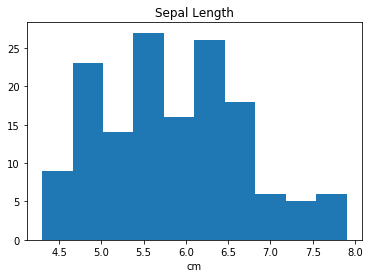

In [5]:
plt.hist(iris.sepal_length)
plt.title('Sepal Length')
plt.xlabel('cm')
plt.show()

Text(0.5,0,'cm')

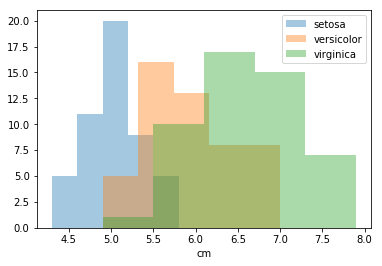

In [6]:
for i, c in enumerate(iris.species.unique()):
    plt.hist(iris[iris['species']==c].sepal_length,
               alpha=0.4, bins=5)
plt.legend(iris.species.unique())
plt.xlabel('cm')

Otro tipo de diagramas son los de violin y caja, los cuales permiten una visualización sin traslape y nos muestran dónde se encuentra la media y la dispersión de los datos.

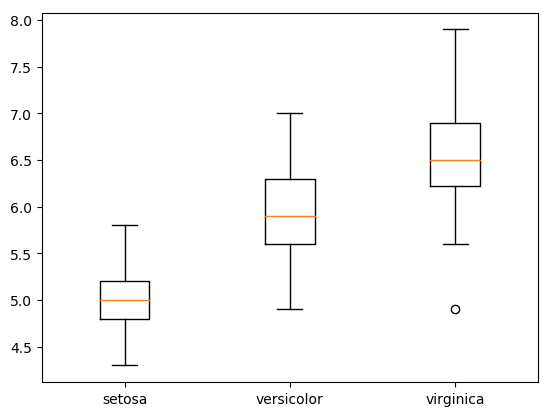

In [7]:
# Crea un array donde cada columna corresponde a una categoría del ciclo for
plt.style.use('default')
iris2 = np.array([iris[iris['species']==c].sepal_length 
                  for c  in iris.species.unique()])
plt.boxplot(iris2.T)
plt.xticks(range(1,4), iris.species.unique())
plt.show()

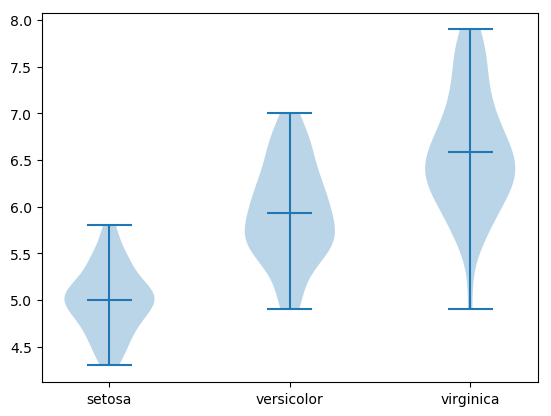

In [8]:
plt.violinplot(iris2.T, showmeans=True)
plt.xticks(range(1,4), iris.species.unique())
plt.show()

### Multiples variables

En caso de que se quiera hacer comparación de multiples variables se recomienda hacer uso de un diagrama de dispersión, el cual compara una variable contra otra. Admite cambios de tamaño además si es necesario hacer uso de una tercera variable.

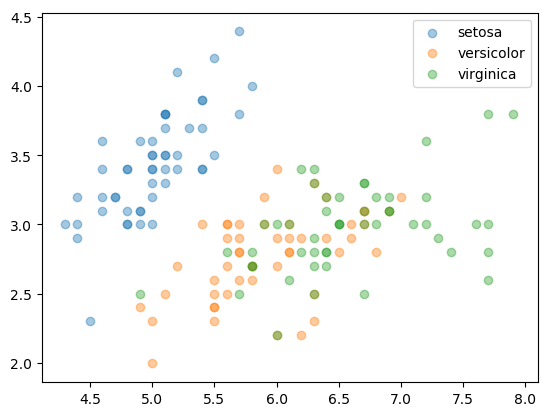

In [9]:
for i, c in enumerate(iris.species.unique()):
    plt.scatter(iris[iris['species']==c].sepal_length, 
                iris[iris['species']==c].sepal_width,
               alpha=0.4)

plt.legend(iris.species.unique())


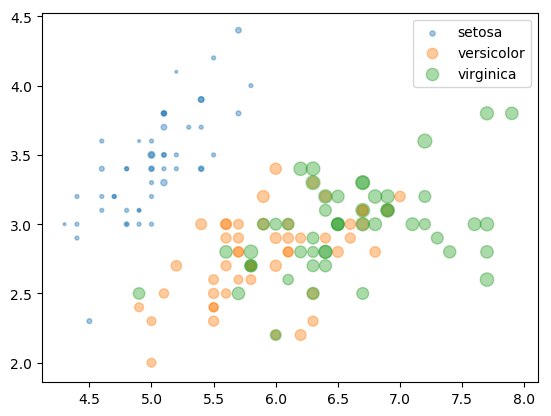

In [10]:
# Considerando una tercera variable

for i, c in enumerate(iris.species.unique()):
    plt.scatter(iris[iris['species']==c].sepal_length, 
                iris[iris['species']==c].sepal_width,
                s=iris[iris['species']==c].petal_width * 40,
               alpha=0.4)

plt.legend(iris.species.unique())


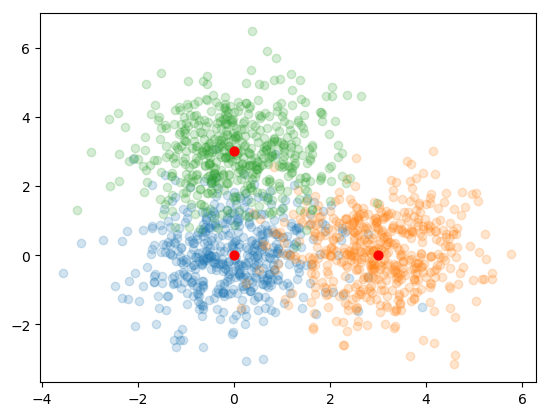

In [11]:
# Medias bidimensionales
means = np.array([[0,0], [3,0], [0,3]])

X = np.array([np.random.randn(500,2) + m for m in means])

for i in range(len(means)):
    plt.scatter(X[i,:,0], X[i,:,1], alpha=0.2)
    plt.scatter(means[i,0], means[i,1], c='red', s=40)

### Scatter matrix

Si se desea mostrar un número mayor a tres variables es recomendable usar la matriz de dispersión (scatter matrix). Esta matriz no está contenida en matplotlib, pero puede ser generada haciendo uso de otra librería conocida como seaborn.

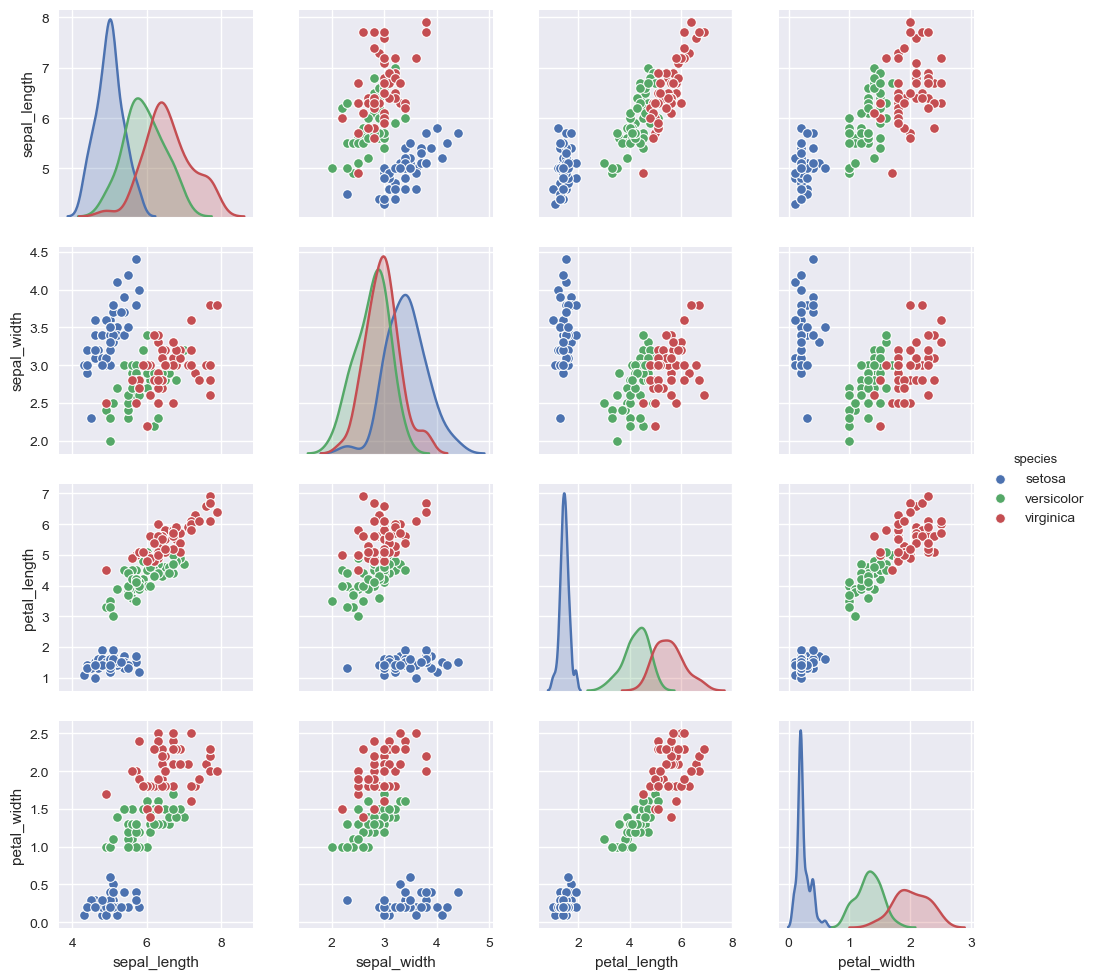

In [41]:
import seaborn as sns
#plt.style.use('Solarize_Light2')
plt.style.use('seaborn')
sns.pairplot(iris, hue='species')
plt.show()

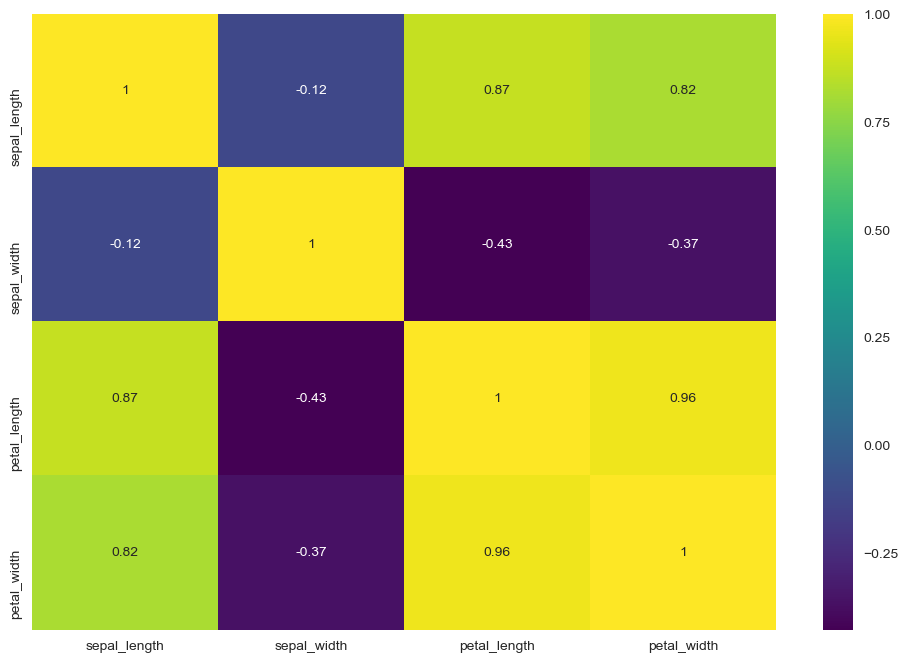

In [13]:
co = iris.corr()
plt.figure(figsize=(12,8))
sns.heatmap(co, annot=True,
           cmap='viridis')

## Series de tiempo

Matplotlib también puede interpretar fechas como un eje, estos pueden tener fechas o simplemente años. El resultado interpola entra las fechas disponibles, por lo que no es necesario que se tengan los datos de dia a dia.

In [14]:
import pandas as pd
df = pd.read_csv('data/cansim.csv', skiprows=6,
                 skipfooter=10)

c:\python36\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [16]:
# Transformar los string de la columna Adjustments a tipo datetime
df.Adjustments = pd.to_datetime(df.Adjustments,  errors='coerce')
df.head()

#df.describe(include='all')

,Adjustments,Unadjusted,Seasonally adjusted
0,1991-01-01,12588862,15026890
1,1991-02-01,12154321,15304585
2,1991-03-01,14337072,15413591
3,1991-04-01,15108570,15293409
4,1991-05-01,17225734,15676083


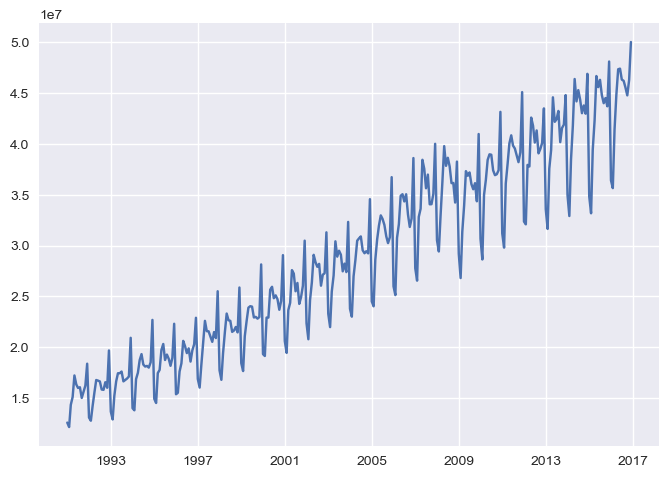

In [17]:
plt.plot(df.Adjustments, df.Unadjusted)
plt.show()

## Anotaciones 
Matplotlib puede generar anotaciones directamente sobre las gráficas para mostrar rangos o momentos de interés. Estos deben corresponder al mismo tipo de dato que el eje sobre el cual se aplica.

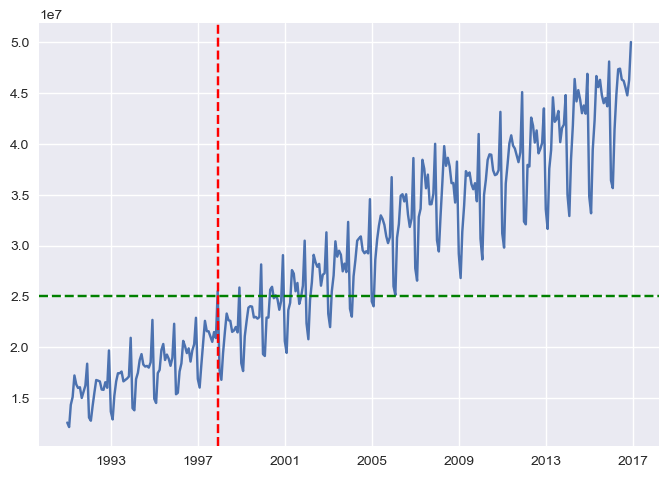

In [18]:
plt.plot(df.Adjustments, df.Unadjusted)

plt.axvline(x='1997-12-01', color='red', linestyle='dashed')
plt.axhline(y=2.5e7, color='green', linestyle='dashed')
plt.show()

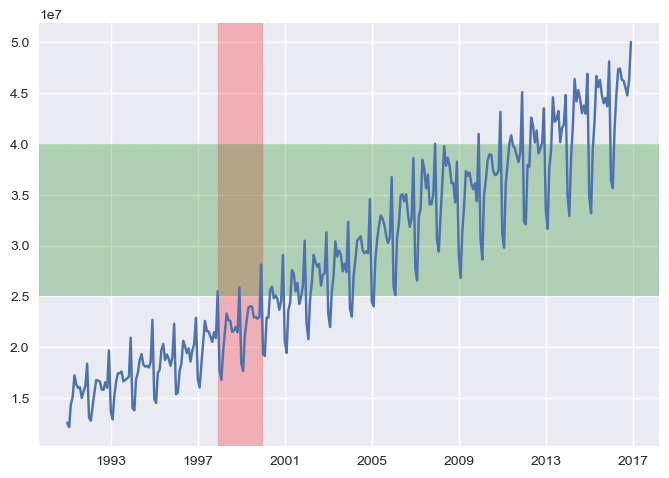

In [19]:
plt.plot(df.Adjustments, df.Unadjusted)

# Anotacion entre el primero de diciembre de 1997 y el 5 de enero de 2000 con transparencia 0.25 y color rojo
plt.axvspan(xmin='1997-12-01', xmax='2000-01-05',
            color='red', linestyle='dashed',
           alpha=0.25)

# Anotacion entre los valores 2.5e7 y 4e7 con transparencia 0.25 y color verde
plt.axhspan(ymin=2.5e7, ymax=4e7,
            color='green', linestyle='dashed',
           alpha=0.25)
plt.show()

## Seaborn
---

Seaborn es una librería para graficación estadística implementada sobre matplotlib. Esta recibe un dataset, posteriormente los valores para lso ejes, así como colores se toman directamente de los valores de las columnas.

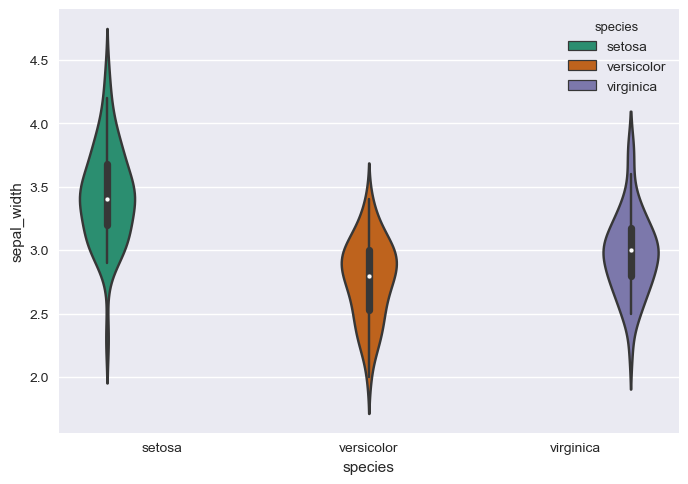

In [42]:
sns.violinplot(data=iris, x='species', 
               y='sepal_width', hue='species',
               palette="Dark2")

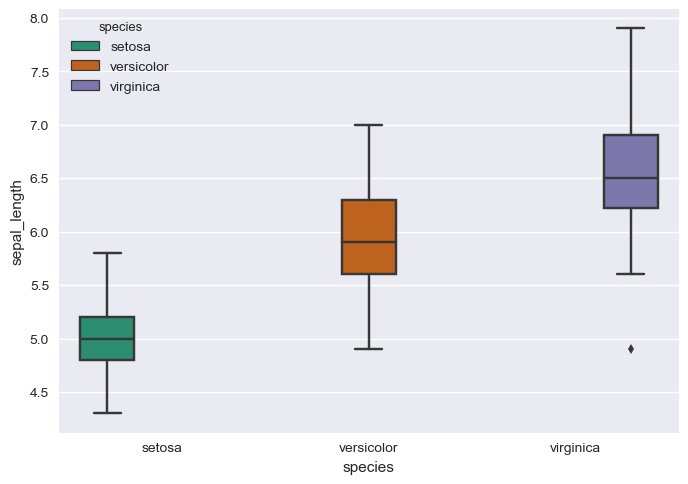

In [43]:
sns.boxplot(data=iris, x='species', 
               y='sepal_length', hue='species',
            palette="Dark2")

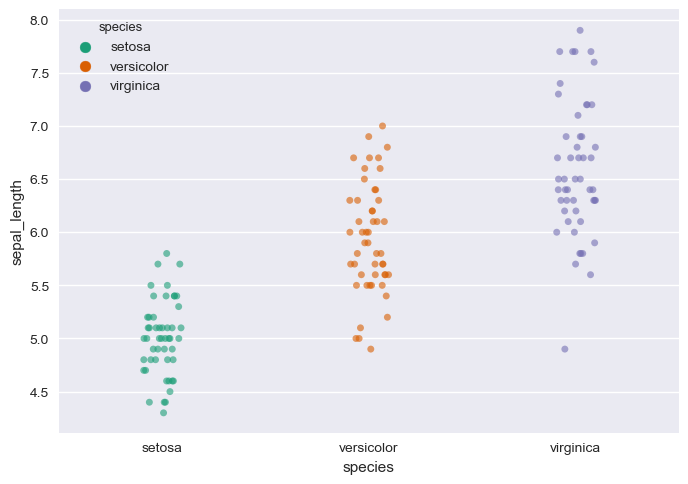

In [44]:
sns.stripplot(data=iris, x='species', 
               y='sepal_length', hue='species',
              palette="Dark2", alpha=0.6,
             jitter=True)

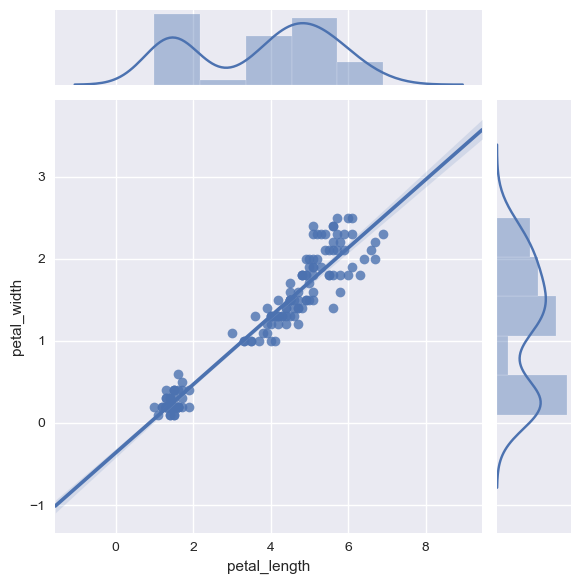

In [45]:
g = sns.JointGrid(x="petal_length", y="petal_width",
                  data=iris)
g = g.plot(sns.regplot, sns.distplot )

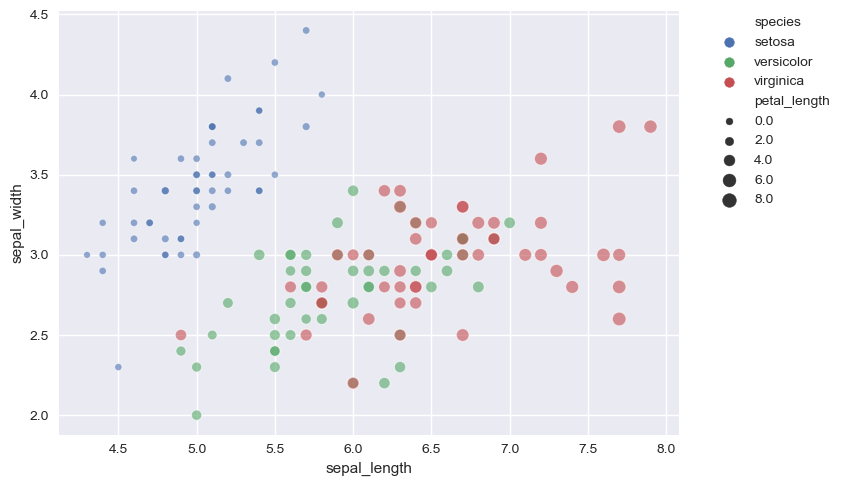

In [51]:
sns.scatterplot(x="sepal_length",
                y="sepal_width",
                size='petal_length',
                hue='species', 
                #style='species',
                alpha=0.6,
                data=iris)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

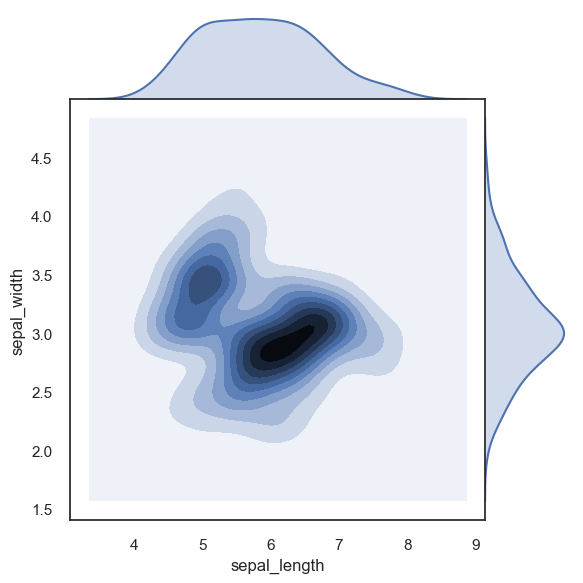

In [54]:
sns.set(style="white", color_codes=True)
sns.jointplot(x="sepal_length", y="sepal_width",
                data=iris,
              kind="kde", space=0)

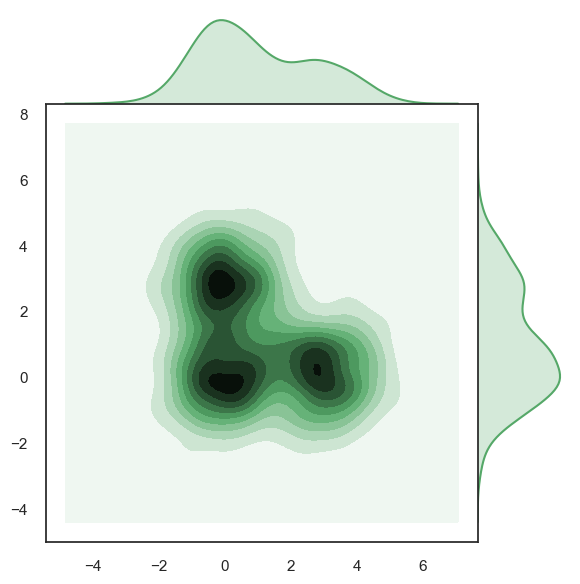

In [55]:
sns.jointplot(x=X[:,:,0], y=X[:,:,1],
              kind="kde", space=0,
              color="g")

# XKCD
___
Los cómics de XKCD son caracterizados por su uso de referencias a ciencia e ingeniería y algunos vienen acompañados de gráficas por el estilo.

In [ ]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'DIA QUE ME DI CUENTA\nQUE PODIA HACER TOCINO\nCUANDO QUISIERA',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('tiempo')
    plt.ylabel('mi salud en general')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

## Imagenes empleando Matplotlib
Matplotlib permite la visualización de imagenes mediante el comando imshow(), a continuación veremos un ejemplo general.


In [ ]:

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.style.use('default')
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.exp(-X**2 - Y**2)

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
                origin='lower', extent=[-3, 3, -3, 3])

plt.show()

Mostrar una imagen con el cómando imshow() tiene los siguientes parametros editables:

matplotlib.pyplot.imshow(*X, cmap=None,  interpolation=None, alpha=None,  origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None*)

* X             -> imagen en sí 
* cmap          -> mapa de colores [revisar mapas de colores]
* interpolation -> método de interpolación para mostrar la imagen. Métodos posibles:

| Metodos| 
|---|---|
    | ‘none’| ‘nearest’| ‘bilinear’| ‘bicubic’| ‘spline16’| ‘spline36’
    | ‘hanning’|‘hamming’|‘hermite’| ‘kaiser’| ‘quadric’| ‘catrom’
    | ‘gaussian’ |‘bessel’ |‘mitchell’ |‘sinc’| ‘lanczos’|
 
* alpha         -> coeficiente de transparencia (de 0 a 1)

### cmap 
---
Respecto a los mapas de colores podemos agruparlos en:
https://matplotlib.org/examples/color/colormaps_reference.html

* 'Perceptually Uniform Sequential':
            'viridis', 'plasma', 'inferno', 'magma'
* 'Sequential':
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
* 'Sequential (2)':
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper'
* 'Diverging':
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
* 'Qualitative':
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
* 'Miscellaneous':
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'


### Cmaps y HTML
La interfaz de jupyter notebook nos permite el empleo del lenguaje HTML, para hacer más detallado o personalizado nuestos campos de texto y documentos finales.
A continuación se ilustra su uso empleando la función img , indicandole la fuente/source (src) y los atributos de descripción de la imagen (alt)


<img src="Class2D/colormaps_reference_00.png", alt="Cmap 00">
<img src="Class2D/colormaps_reference_01.png", alt="Cmap 01">
<img src="Class2D/colormaps_reference_02.png", alt="Cmap 02">
<img src="Class2D/colormaps_reference_03.png", alt="Cmap 03">
<img src="Class2D/colormaps_reference_04.png", alt="Cmap 04">
<img src="Class2D/colormaps_reference_05.png", alt="Cmap 05">

In [ ]:
ima = plt.imread("Class2D/iris-machinelearning.png")
plt.figure(figsize=(20,10))
plt.imshow(ima)
plt.title('Iris')
plt.axis('off')
plt.show()

In [ ]:
#Imagen simple
%matplotlib inline 
import matplotlib.pyplot as plt 

image = plt.imread('Class2D/fruta.png')
fig, ax = plt.subplots();
ax.imshow(image)
ax.axis('off') 

Es posible efectuar operaciones sobre la imagen antes de mostrarla, tomando como ejemplo la interpolación/cambio de tamaño. 

In [ ]:
imageF = plt.imread('Class2D/fruta.png')
fig, ax = plt.subplots();
ax.imshow(imageF,interpolation='kaiser')
ax.axis('off') 

A = np.random.rand(6, 6)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    
plt.show()

# Lista de otras variables de ejecución interna de la función:
# https://docs.python.org/3.3/library/functions.html#zip

In [ ]:
# Uso de zip: Concatenador elemento a elemento en forma de tupla
 
B = [1,2,3]
C = ["a","v","b"]
D=zip(B,C)
print(list(D))

###  Capas de una imagen
---
Formatos de imagen usados:
* RGB


In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
for i,j in zip( axs ,range(0,3) ):
    A=imageF[:, :, j]
#    i.imshow (  A ,cmap='jet')
    i.imshow(A,cmap='gray', vmin=0, vmax=1)
    i.axis('off')


In [ ]:

## Dash Plot



# Ejercicios I práctica de las funciones

### Decorator 
* Utiliza el decorator de tiempo propuesto y compara el resultado de emplear time.time() y time.clock() en una función de     ejecución rápida
* Diseña una lista de argumentos para *arg y un diccionario para *kw, emplealos en una función libre [puede ser simplemente imprimir la lista y el diccionario] y emplea la función dada para observar el retorno de estos valores. 

### Numpy

#### Arreglos
* Crea un arreglo de tipo complejo cuyos valores únicamente tengan parte imaginaria. 
* Crea un linespace de 1 a 5 y compara sus elementos con un range de 1 a 5 empleando 2 fors diferentes
* Crea un arreglo de 27 elementos, aplica un reshape de 3x3x3 y aplica la función de suma o resta sobre cada uno de los ejes posibles (0, 1 y 2). Repite el procedimiento con un reshape de 3x9  
* Ejecuta reshape utilizando la función -1 con una combinación de números en que no sea posible obtener un resultado:
[dados 14 elementos un reshape(3,-1) no es posible]

#### Algebra
* Compara el resultado de una pseudoinversa y una inversa de una matriz cuadrada dada.
* ¿Porqué el array Y (target) del sistema de ecuaciones está declarado como [a,b] y no como [[a],[b]]?
* Resuelve el siguiente sistema de ecuaciones de 4 x 4
$ Ax=Y\\ 1x_1+2x_2+3x_3+4x_4=1\\
         2x_1+0x_2+2x_3+0x_4=2\\ 
         2x_1+5x_2+6x_3+7x_4=4\\
         0x_1+1x_2+3x_3+1x_4=8\\ $
         
Respuesta para el vector X:         
Vectores para copiar: A=([[1,2,3,4],[2,0,2,0],[2,5,6,7],[0,1,3,1]])   Y= ([-1,2,4,8])

Respuesta: array([-1.85714286,  2.71428571,  2.85714286, -3.28571429])



#### Matplotlib 
* Plotea una gráfica de la función seno y sobre el mismo axis plotea una función coseno cuya frecuencia 
  sea del doble que la primera. 
  
  El vector ploteado debe tener al menos 100 elementos, empezar en $-\pi$ y terminar en $\pi$.
  
  Los limites de esta gráfica deben ser $-2\pi$ y $2\pi$ en el eje X, y de -2 a 2 en el eje Y.
* Usar una imagen a gusto y mostrarla sin alteraciones. 

# Ejercicios II  (Para llevar)

### Numpy
* Dados los siguientes vectores emplear la definición de producto punto para obtener el valor del ángulo entre dichos vectores. Tip: "np.linalg.norm" es la norma general para ser aplicada en matrices

A=np.array([0,2,1])

B=np.array([4,1,1])

Respuesta: 71.56505117707799° o 1.2490457723982544 radianes

* Algoritmo de PCA, considerando parte de programación y matemática


## Algoritmo de PCA
---
#### Introducción
El analisis de componentes principales, PCA por sus siglas en inglés, es un algoritmo que nos permite una visualización más simple de conjuntos con alta dimensionalidad/multiples variables caracteristimas. 

Como su nombre lo indica el algorimo desarrolla el concepto de "componentes principales", una componente o variable resultante de la combinación lineal del resto de las variables aumentando la "representatividad" gráfica.

Una ventaja interesante es que aunque PCA lleva de un espacio de cierta dimensión N a otra dimensión N, es posible tomar únicamente los datos más representativos para una gráfica de 2 o 3 dimensiones. A continuación se listan los pasos

#### Método

1. Tener una distribución de datos, puede ser más de un set de datos.
2. Normalizar los datos respecto a la media (restarle a cada elemento el centro de masa del conjunto)
3. Calcular la matriz de covarianza (detallada más adelante)
4. Calcular tanto eigenvalores como eigenvectores, asociando a cada eigenvector con su eigenvector generador.
5. Enlistar de mayor a menos los eigenvalores, y en consecuencia teniendo ordenados los eigenvectores.
6. Escoger "K" eigenvectores para la dimensionalidad de salida.
7. Tomando desde el "mayor" eigenvector apilarlos horizontalmente para tener una matriz $W$ de dimensiones $K x M$ dónde es la cantidad de clases presentes en nuestro datasets.
8. Esta matriz $W$ es la matriz de transformación, para aplicarla se realiza el producto de $W^\top Muestras$


### Matplotlib
* Algoritmo de PCA, considerando parte ilustrativa
* imagen

In [ ]:
sns.set(style="ticks", color_codes=True)
wh = pd.read_csv("data/weight-height.csv")
wh.head()

In [ ]:
co = wh.corr()
co
plt.figure(figsize=(12,8))
sns.heatmap(co,
           annot=True)

In [ ]:
sns.pairplot(data=wh,
             kind='reg',
             diag_kind="kde",
             diag_kws=dict(shade=True),
            hue="Gender")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(X=wh.drop(['Gender'], axis=1))

pca_wh = pd.DataFrame(X2, columns=['PC_1', 'PC_2'])
pca_wh["Gender"] = wh.Gender
pca_wh.head()

In [ ]:
sns.pairplot(data=pca_wh, hue='Gender', 
             kind="reg",
             diag_kind="kde",
             diag_kws=dict(shade=True))